In this notebook we will see how to represent 2-dimensional fields, for example a temperature or salinity field depending on the coordinates longitude and latitude. The example will use the outputs from a numerical model in the Western Mediterranean Sea.

In another notebook, we will explain how to plot data on a map.

In [3]:
import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import matplotlib as mpl
%matplotlib inline

The input file comes from an operational model running on the Western Mediterranean Sea.<br>
It is available through [OPeNDAP](http://www.opendap.org/) protocol:

In [1]:
datafile = "http://thredds.socib.es/thredds/dodsC/operational_models/" + \
"oceanographical/hydrodynamics/wmop/2016/01/roms_wmop_20160117.nc"

# Load the variables

In [4]:
with netCDF4.Dataset(datafile, 'r') as nc:
    temperature = nc.variables['temp'][:]
    lon = nc.variables['lon_rho'][:]
    lat = nc.variables['lat_rho'][:]

Here the temperature field also depends on the time:

In [10]:
print temperature.shape

(25, 539, 631)


so we will only considered the field corresponding to the first time step.

In [53]:
temperature2plot = np.ma.masked_invalid(temperature2plot)

# Make the plot

There are several options to represent a 2-D field:
* the pseudo-color ([pcolor](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pcolor)) plot,
* the [contour](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.contour) plot and
* the [filled contour](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.contourf) plot.

They are illustrated in the next figure.

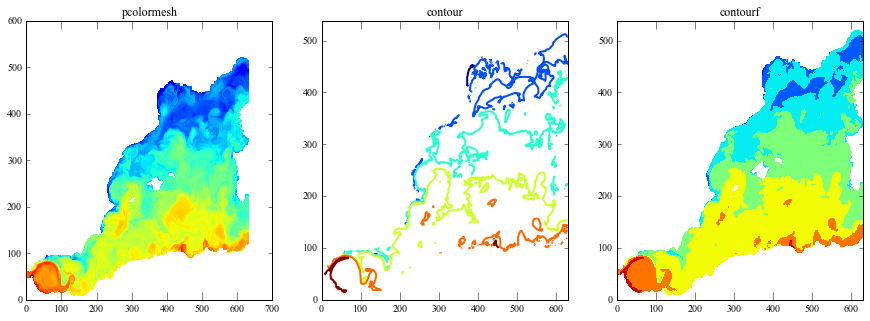

In [59]:
figure = plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.pcolormesh(temperature2plot)
plt.title('pcolormesh')
plt.subplot(132)
plt.contour(temperature2plot)
plt.title('contour')
plt.subplot(133)
plt.contourf(temperature2plot)
plt.title('contourf')
plt.show()

Note that the plots are obtained without specifying anything in the functions.<br/>
We can now see how to create high-quality figure.

## Pseudo-color plot

Among the things we can do to improve the plot
* Add a colorbar.
* Use the coordinates.
* Change the color palette ([rainbow colormap](https://eagereyes.org/basics/rainbow-color-map) should be avoided). 
* Add labels and title.

In [69]:
cmap = plt.cm.RdYlBu_r
mpl.rcParams.update({'font.size': 20, 'font.family': 'Times New Roman'})

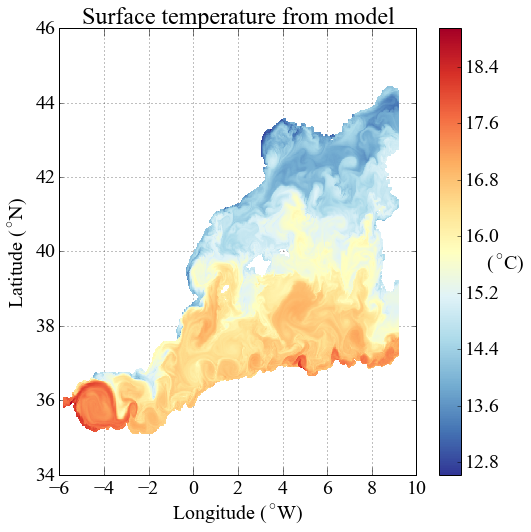

In [82]:
plt.figure(figsize=(8, 8))
plt.pcolormesh(lon, lat, temperature2plot, cmap=cmap, zorder=3)
cbar = plt.colorbar()
plt.xlabel('Longitude ($^{\circ}$W)')
plt.ylabel('Latitude ($^{\circ}$N)')
plt.title('Surface temperature from model')
plt.grid(zorder=2)
cbar.set_label('($^{\circ}$C)', rotation=0)
plt.show()

The limits for the color scale are set automatically, but they can also be fixed using the vmin/vmax arguments of pcolormesh.

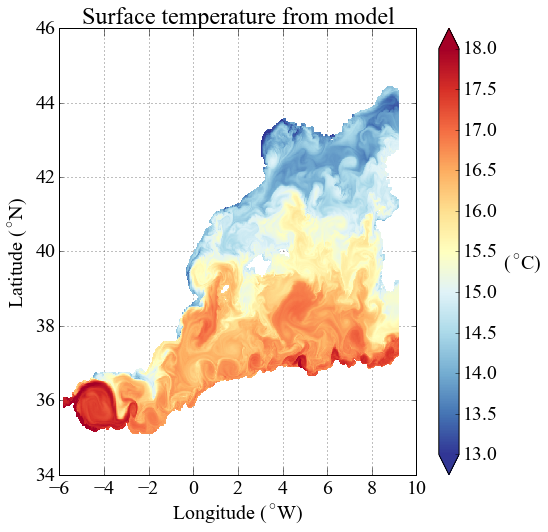

In [84]:
plt.figure(figsize=(8, 8))
plt.pcolormesh(lon, lat, temperature2plot, cmap=cmap, zorder=3, vmin=13., vmax=18.)
plt.xlabel('Longitude ($^{\circ}$W)')
plt.ylabel('Latitude ($^{\circ}$N)')
plt.title('Surface temperature from model')
plt.grid(zorder=2)
cbar = plt.colorbar(extend='both')
cbar.set_label('($^{\circ}$C)', rotation=0, horizontalalignment='left')
plt.show()

## Contour plot

In general the contours have the samecolors.<br/>
We chose to have them every 0.5°C.<br/>
Finally we had labels on these contours.

In [93]:
levels2plot = np.arange(12., 19., 0.5)

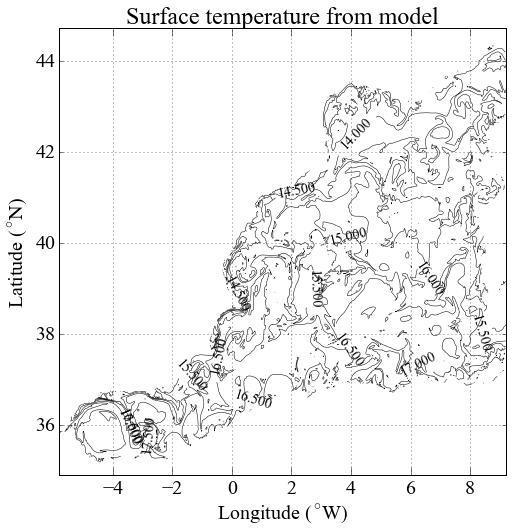

In [94]:
plt.figure(figsize=(8, 8))
cont = plt.contour(lon, lat, temperature2plot, levels2plot, colors='black', linewidths=0.5)
plt.clabel(cont, inline=1, fontsize=14)
plt.xlabel('Longitude ($^{\circ}$W)')
plt.ylabel('Latitude ($^{\circ}$N)')
plt.title('Surface temperature from model')
plt.grid(zorder=2)
plt.show()

This type of field is not the best example for the contour.<br>
Altimetry fields (sea-level anomaly, absolute dynamic topography) would give better results.